In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from lazy_GP import ARGP

Create an auto-regressive time series

In [8]:
np.random.seed(42)  # For reproducibility
D = 3  # Number of exogenous features
N = 100  # Number of samples
N_AR = 2  # Number of auto-regressive components

# Generate random exogenous inputs
X = np.random.rand(N, D)

# True coefficients for exogenous inputs and AR components
theta_exog = np.array([2.0, -1.0, 0.5]).reshape(-1, 1)  # Coefficients for exogenous inputs
theta_ar = np.array([0.2, -0.1]).reshape(-1, 1)         # Coefficients for AR components
true_theta = np.vstack([theta_exog, theta_ar])
sigma = 0.001

# Generate target values with AR components
y = np.zeros(N)
for t in range(N_AR, N):
    y[t] = (
        X[t] @ theta_exog +  # Contribution from exogenous inputs
        y[t-N_AR : t] @ theta_ar  # Contribution from AR components
    )

# Observation noise
y = y + sigma * np.random.randn(N)

/tmp/ipykernel_65936/1078283706.py:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y[t] = (


Train using 50 points 

In [9]:
m = ARGP()
theta = np.ones(5)
X_train = X[:50, :]
y_train = y[:50]
m.set_hyperparameters(X=X_train, y=y_train, theta=theta, sigma=sigma, N_AR=N_AR)

CG converged in 48 iterations.


Analyse model predictions

In [10]:
y_pred = m.predict_full_model(X[N_AR:], y0=y[:N_AR])

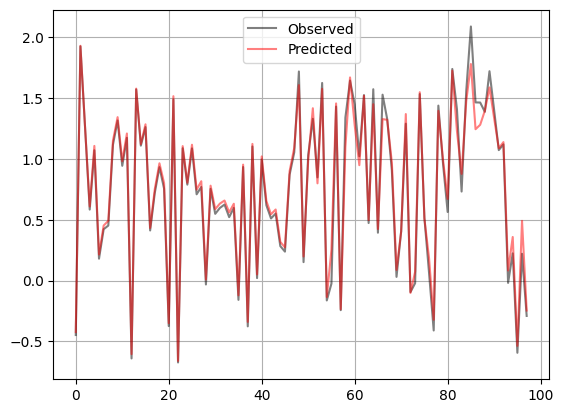

In [11]:
fig, ax = plt.subplots()
ax.plot(y[N_AR:], color='black', alpha=0.5, label='Observed')
ax.plot(y_pred, color='red', alpha=0.5, label='Predicted')
ax.grid()
ax.legend()
plt.show()